In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

max_iter = 100

In [2]:
def changes_sign(function, left_bound, right_bound):
    return function(left_bound) * function(right_bound) < 0

def plot_on_interval(f, a, b, current_x):
    x = np.linspace(a, b, 100)
    y = f(x)

    fig, ax = plt.subplots()

    plt.plot(x, y)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(current_x, color='red', lw=1)
    ax.axvline(0, color='black', lw=1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    return ax

def det(A):
    return A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]

In [3]:
def newton(f, df, lbound, rbound, eps):
    if not changes_sign(f, lbound, rbound):
        raise Exception("Функция не меняет знак на заданном отрезке")

    iterations = 0
    x0 = rbound
    while iterations < max_iter:
        iterations += 1
        x = x0 - f(x0) / df(x0)
        if abs(x - x0) < eps:
            return x, iterations
        x0 = x

    raise Exception("Метод Ньютона не смог сойтись при заданном x0, нужно выбрать интервал, на котором произведение первой и второй производных положительно")


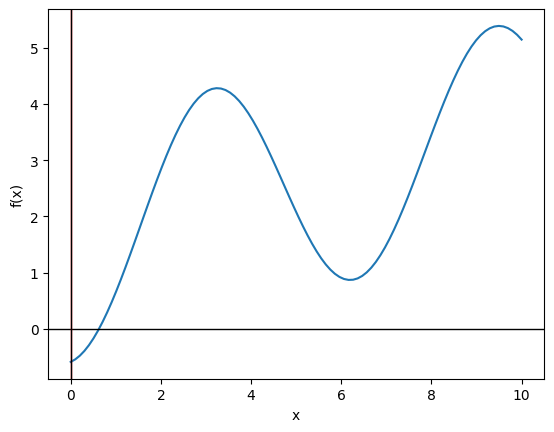

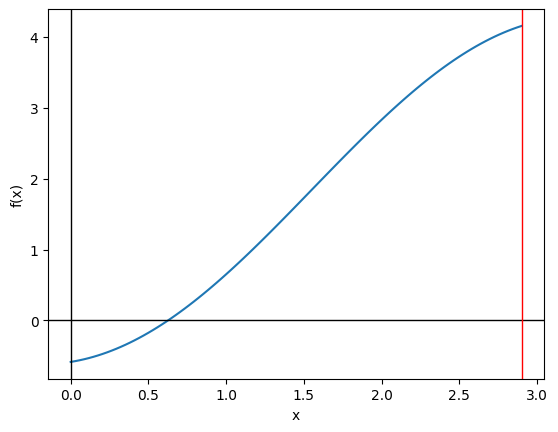

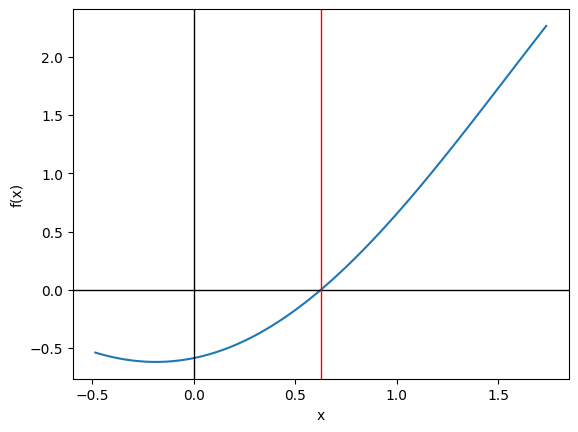

x = 0.6262174152596838, iterations = 9


In [4]:
def f(x):
    return np.sqrt(x + 2) - 2 * np.cos(x)

def df(x):
    return 2*np.sin(x) + 1 / np.sqrt(x + 2)

plot_on_interval(f, 0, 10, 0)
lbound = 0
rbound = 2.9
plot_on_interval(f, lbound, rbound, rbound)


x, iterations = newton(f, df, lbound, rbound, 1e-3)

plot_on_interval(f, x - 10 / iterations, x + 10 / iterations, x)
print("x = {0}, iterations = {1}".format(x, iterations))

In [5]:
def iterations(f, df, lbound, rbound, eps):
    if not changes_sign(f, lbound, rbound):
        raise Exception("Функция не меняет знак на заданном отрезке")

    iterations = 0
    x0 = (rbound + lbound) / 2
    lamb = 1 / df(x0)
    while iterations < max_iter:
        iterations += 1
        x = x0 - lamb * f(x0)
        if abs(x - x0) < eps:
            return x, iterations
        x0 = x

    raise Exception("Метод итераций не смог сойтись при заданном x0")

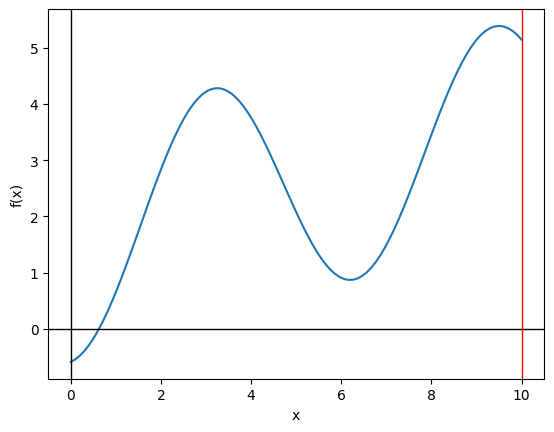

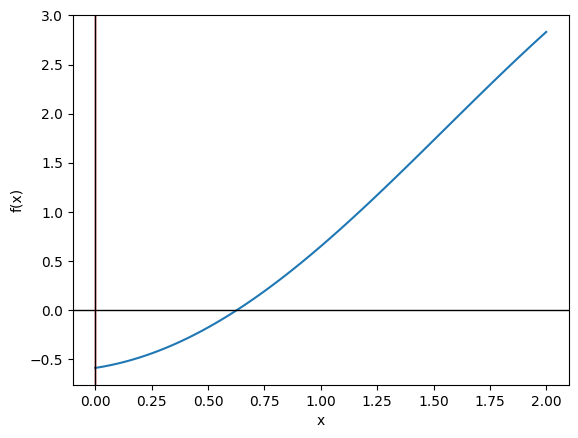

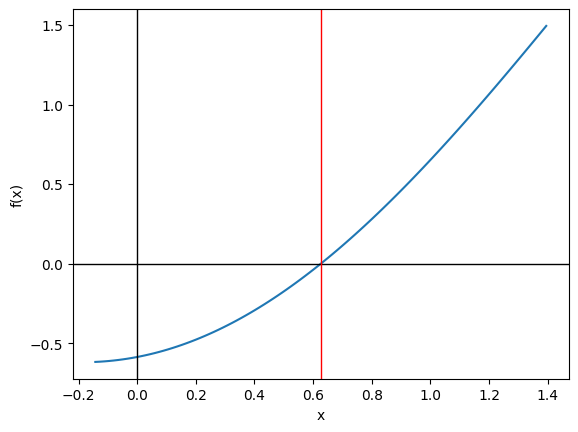

x = 0.6261768305190578, iterations = 13


In [6]:
lbound = 0
rbound = 2
plot_on_interval(f, 0, 10, current_x=10)
plot_on_interval(f, lbound, rbound, current_x=0)
x, iterations = iterations(f, df, lbound, rbound, 1e-6)
plot_on_interval(f, x - 10 / iterations, x + 10 / iterations, x)
print("x = {0}, iterations = {1}".format(x, iterations))

# Системы нелинейных уравнений

## Метод Ньютона

In [7]:
def f1(x, y):
    return x**2 - y + y**2 - 1

def f2(x, y):
    return x - np.sqrt(y + 1) + 1

def d_f1_x(x):
    return 2*x

def d_f1_y(y):
    return 2*y - 1

def d_f2_x():
    return 1

def d_f2_y(y):
    return -1/ (2 * np.sqrt(y+1))

def j(x, y):
    return det(np.array([
        [d_f1_x(x), d_f1_y(y)],
        [d_f2_x(), d_f2_y(y)]
    ]))

def a1(x, y):
    return det(np.array([
        [f1(x, y), d_f1_y(y)],
        [f2(x, y), d_f2_y(y)]
    ]))

def a2(x, y):
    return det(np.array([
        [d_f1_x(x), f1(x, y)],
        [d_f2_x(), f2(x, y)]
    ]))

def check_converging_newton(j, x0, y0):
    if j(x0, y0) == 0:
        print('Метод не сходится, определитель якобиана равен нулю')
        return False
    return True

def is_accuracy_achieved(x, x_prev, eps):
    return np.max(np.abs(x - x_prev)) <= eps

def newton_system(initial, eps):

    if not check_converging_newton(j, initial[0], initial[1]):
        return

    iterations = 0

    while iterations < max_iter:
        iterations += 1
        x0 = initial[0]
        y0 = initial[1]
        solution = np.array(
            [x0 - a1(x0, y0) / j (x0, y0),
             y0 - a2(x0, y0) / j(x0, y0)]
        )
        if is_accuracy_achieved(solution, initial, eps):
            return solution, iterations

        initial = solution

    raise Exception("Newton method for system cannot converge")

def plot_system(f1, f2, lbound, rbound, solution):

    x_for_circle = np.linspace(-rbound, rbound, 100)
    x_for_line = np.linspace(lbound, rbound, 100)
    X, Y = np.meshgrid(x_for_circle, x_for_circle)
    circle = f1(X, Y)
    X_LINE, Y_LINE = np.meshgrid(x_for_line, x_for_line)
    line = f2(X_LINE, Y_LINE)

    fig, ax = plt.subplots()
    plt.contour(X,Y,circle,[0], colors='b')
    plt.contour(X_LINE, Y_LINE, line, [0], colors='g')

    ax.axhline(solution[1], color='red', lw=1)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(solution[0], color='red', lw=1)
    ax.axvline(0, color='black', lw=1)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

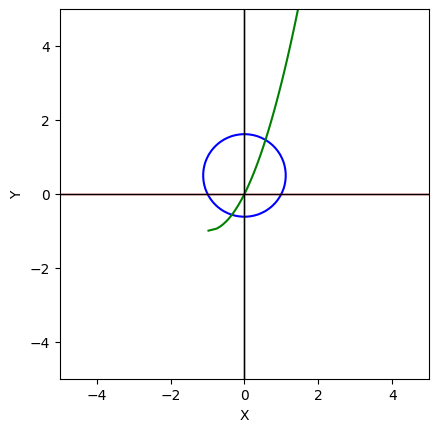

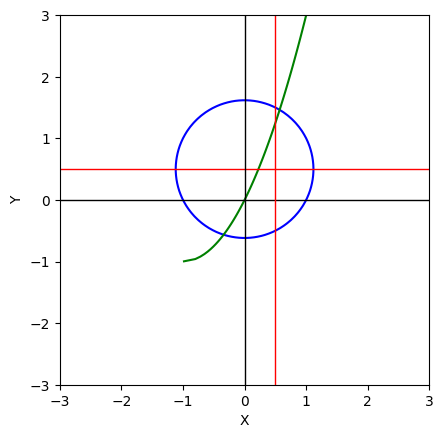

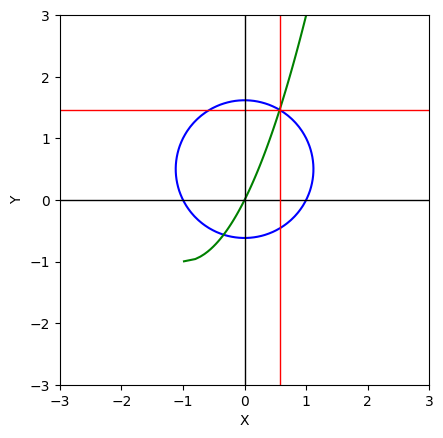

[0.569 1.462]
iterations = 7


In [8]:
lbound = -1
rbound = 3
init_solution = np.array([0.5, 0.5])
plot_system(f1, f2, -1, 5, [0, 0])
plot_system(f1, f2, lbound, rbound, init_solution)
solution, iterations = newton_system(init_solution, 1e-6)
plot_system(f1, f2, lbound, rbound, solution)
print(solution)
print("iterations = {0}".format(iterations))

## Метод итераций

In [14]:
def f1(x, y):
    return x - np.cos(y) - 1

def f2(x, y):
    return y - np.sin(x) - 1

def phi1(y):
    return np.cos(y) + 1

def phi2(x):
    return np.sin(x) + 1

def f(solution):
    x = solution[0]
    y = solution[1]
    return np.array([f1(x, y), f2(x, y)])

def check_converging_simple_iterations(f, x0):
    # Проверяем непрерывность
    delta_x = 1e-6
    f_x0 = f(np.array([x0, x0]))
    f_x0_delta = f(np.array([x0 - delta_x, x0 + delta_x]))
    if not np.allclose(f_x0, f_x0_delta, rtol=1e-5):
        return False

    # Проверяем производную
    delta_x = 1e-6
    df_x0 = np.array([(f(x0 + delta_x)[0] - f(x0)[0]) / delta_x, (f(x0 + delta_x)[1] - f(x0)[1]) / delta_x])
    df_x0_delta = np.array([(f(x0 + delta_x)[0] - f(x0 - delta_x)[0]) / (2 * delta_x),
                            (f(x0 + delta_x)[1] - f(x0 - delta_x)[1]) / (2 * delta_x)])
    if not np.allclose(df_x0, df_x0_delta, rtol=1e-5):
        return False

    return True

def iterations_system(initial, eps):
    if not check_converging_simple_iterations(f, initial):
        print("Метод простых итераций не сойдется")
        return

    iterations = 0

    while iterations < max_iter:
        iterations += 1

        x0 = initial[0]
        y0 = initial[1]

        solution = np.array([
            phi1(y0),
            phi2(x0)
        ])

        #plot_system(f1, f2, lbound, rbound, solution)

        if is_accuracy_achieved(solution, initial, eps):
            return solution, iterations

        initial = solution

    raise Exception("Iterations method for system cannot converge")

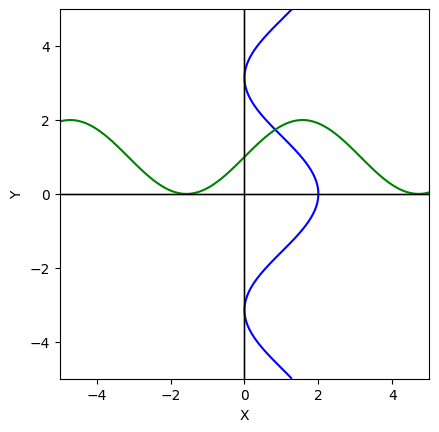

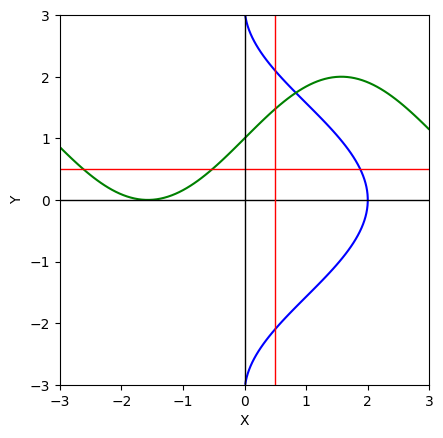

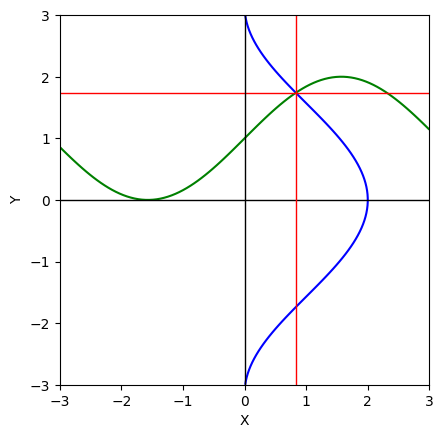

[0.836 1.743]
iterations = 22


In [21]:
lbound = -3
rbound = 3
init_solution = np.array([0.5, 0.5])
plot_system(f1, f2, -5, 5, [0, 0])
plot_system(f1, f2, lbound, rbound, init_solution)
solution, iterations = iterations_system(init_solution, 1e-2)
plot_system(f1, f2, lbound, rbound, solution)
print(solution)
print("iterations = {0}".format(iterations))

## Метод Зейделя

In [11]:
def zeidel_system(initial, eps):
    if not check_converging_simple_iterations(f, initial):
        print("Метод Зейделя не сойдется")
        return

    iterations = 0

    while iterations < max_iter:
        iterations += 1

        y0 = initial[1]
        x0 = phi1(y0)

        solution = np.array([
            x0,
            phi2(x0)
        ])
        #plot_system(f1, f2, lbound, rbound, solution)

        if is_accuracy_achieved(solution, initial, eps):
            return solution, iterations

        initial = solution

    raise Exception("Zeidel method for system cannot converge")

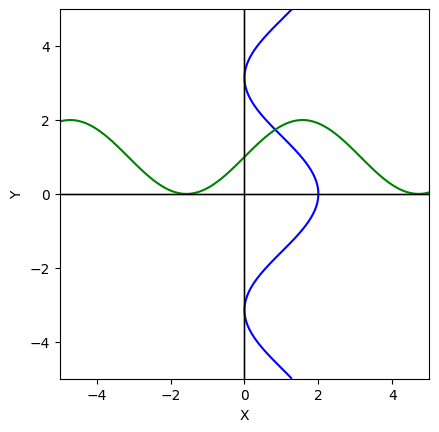

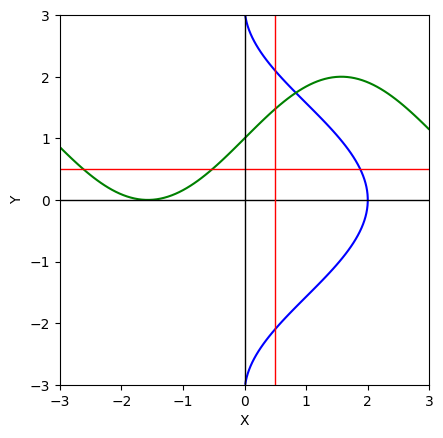

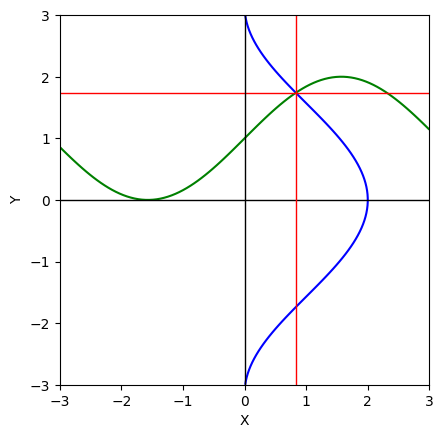

[0.829 1.737]
iterations = 12


In [12]:
lbound = -3
rbound = 3
init_solution = np.array([0.5, 0.5])
plot_system(f1, f2, -5, 5, [0, 0])
plot_system(f1, f2, lbound, rbound, init_solution)
solution, iterations = zeidel_system(init_solution, 1e-2)
plot_system(f1, f2, lbound, rbound, solution)
print(solution)
print("iterations = {0}".format(iterations))